<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/korea/blob/main/5_most_polluted_area_in_seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''importing module'''
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


    This is very basic module that we can use to read files and visualize it.

In [4]:
'''importing data'''
data1 = pd.read_csv('/content/drive/MyDrive/한국분석/air_pollution_in_seoul/AirPollutionSeoul/Measurement_summary.csv')

    I open the dataset that we use for this analysis. this data i get from: https://www.kaggle.com/bappekim/air-pollution-in-seoul. this is short preview about this data

    1. This dataset deals with air pollution measurement information in Seoul, South Korea.
    2. This data provides average values for six pollutants (SO2, NO2, CO, O3, PM10, PM2.5).
    3. Data were measured every hour between 2017 and 2019.
    4. Data were measured for 25 districts in Seoul.


In [5]:
'''showing head of dataframe'''
data1.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.047,0.002,1.1,74.0,63.0


In [6]:
'''showing tail'''
data1.tail(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647501,2019-12-31 14:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.017,0.023,0.4,23.0,18.0
647502,2019-12-31 15:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.020,0.021,0.4,24.0,18.0
647503,2019-12-31 16:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.026,0.016,0.4,27.0,18.0
647504,2019-12-31 17:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.031,0.012,0.4,27.0,19.0
647505,2019-12-31 18:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.035,0.008,0.5,24.0,18.0
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0
647510,2019-12-31 23:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.037,0.005,0.5,27.0,18.0


    Before we get to deep about the analysis i want to share about the pollutants.
    
    1. Sulfur dioxide is the chemical compound with the formula SO2. It is a toxic gas responsible for the smell of burnt matches (source: wikipedia)
    
    2. Nitrogen dioxide is part of a group of gaseous air pollutants produced as a result of road traffic and other fossil fuel combustion processes. Its presence in air contributes to the formation and modification of other air pollutants, such as ozone and particulate matter, and to acid rain (source: greenfact.org)
    
    3. Ozone is the most important photochemical oxidant in the troposphere. It is formed by photochemical reactions in the presence of precursor pollutants such as NOx and volatile organic compounds (source: greenfact.org)
    
    4. Carbon monoxide (CO) is a colorless, odorless, and tasteless flammable gas that is slightly less dense than air. It is toxic to animals that use hemoglobin as an oxygen carrier (both invertebrate and vertebrate) when encountered in concentrations above about 35 ppm, although it is also produced in normal animal metabolism in low quantities, and is thought to have some normal biological functions (source: wikipedia)
    
    5. Particulate matter such as PM10, PM2.5, PM1 and PM0.1 is defined as the fraction of particles with an aerodynamic diameter smaller than respectively 10, 2.5, 1 and 0.1 µm (for your information: 1 µm = 1 millionth of a meter or 1 thousandth of a millimeter). In comparison, the average diameter of a human hair equals 50-70 µm (see figure below)

In [7]:
'''showing shape'''
data1.shape

(647511, 11)

    This is pretty big data that we can analyze, consist 647511 rows and 11 columns

In [8]:
'''showing columns'''
data1.columns.tolist()

['Measurement date',
 'Station code',
 'Address',
 'Latitude',
 'Longitude',
 'SO2',
 'NO2',
 'O3',
 'CO',
 'PM10',
 'PM2.5']

    This code is to get information about the column/feature from the dataset

In [9]:
'''showing sum on missing values'''
print(data1.isnull().values.sum())

'''showing missing values from each columns'''
print(data1.isnull().sum())

0
Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64


    As you can see, this is pretty clean data that does not consist missing values!

In [10]:
'''showing sum of unique value from each columns'''
data1.nunique()

,0
Measurement date,25906
Station code,25
Address,25
Latitude,25
Longitude,25
SO2,186
NO2,132
O3,253
CO,172
PM10,551


    From this we can see that, this data is got from 25 station code from 25 different location

In [11]:
'''showing type of columns'''
data1.dtypes

,0
Measurement date,object
Station code,int64
Address,object
Latitude,float64
Longitude,float64
SO2,float64
NO2,float64
O3,float64
CO,float64
PM10,float64


    The data type also already convert to float which is better to present small number

In [12]:
'''showing info of dataframe'''
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [13]:
'''showing descriptive statistics'''
data1.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


    From this output we can condlude that:
    1. Many of pollutants have maximum values greater than outer quantile Q3 (0.75). Like PM10 which have Q3 value 53 but have maximum values 3586. This will be concern to us when we choose the method that represent the overall values.
    2. Negative value i think is the data which have no record

In [14]:
'''showing descriptive statistcs from categorical columns'''
data1.describe(include=['O'])

,Measurement date,Address
count,647511,647511
unique,25906,25
top,2017-01-01 00:00,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re..."
freq,25,25906


    We can see that on this dataset, there is 25906 record during 2017 to 2019 in 25 sub-distrcit in Seoul

In [15]:
'''showing unique value from address columns'''
print(data1.Address.unique().tolist())

['19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea', '15, Deoksugung-gil, Jung-gu, Seoul, Republic of Korea', '136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea', '215, Jinheung-ro, Eunpyeong-gu, Seoul, Republic of Korea', '32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul, Republic of Korea', '10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea', '18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Republic of Korea', '571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republic of Korea', '43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea', '369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea', '70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Republic of Korea', '49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea', '34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Republic of Korea', '17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republic of Korea', '56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Republic of Korea', '71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic of Korea', '45

    I try to figure out unique value of the address (record station)

Total Address:  25
                                             Address  PM10
0  136, Hannam-daero, Yongsan-gu, Seoul, Republic...  30.0
1  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  32.0
2  369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...  32.0
3  49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Rep...  32.0
4  43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...  32.0
5  15, Deoksugung-gil, Jung-gu, Seoul, Republic o...  32.0
6  426, Hakdong-ro, Gangnam-gu, Seoul, Republic o...  33.0
7  20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Rep...  34.0
8  34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...  34.0
9  32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...  34.0
Total Address:  25
                                              Address  PM2.5
0   49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Rep...   17.0
1   32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...   18.0
2   15, Deoksugung-gil, Jung-gu, Seoul, Republic o...   18.0
3   43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...   18.0
4   369,

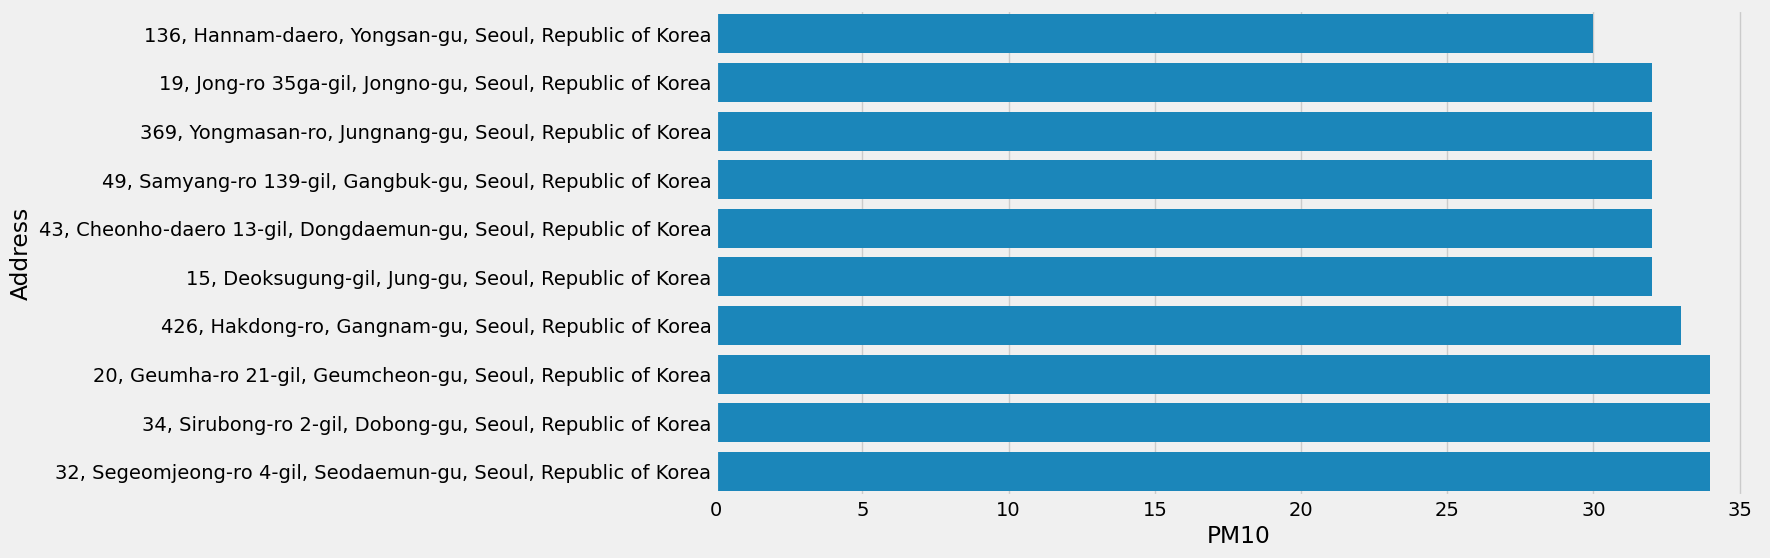

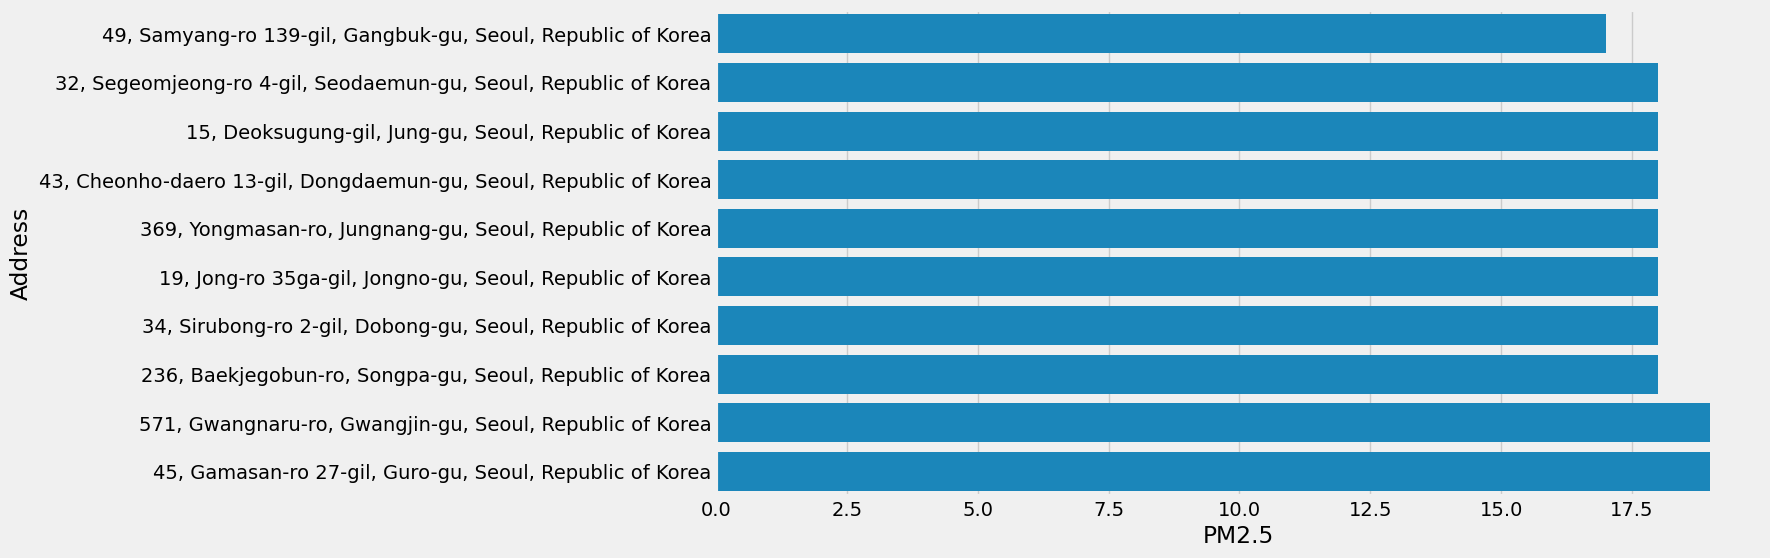

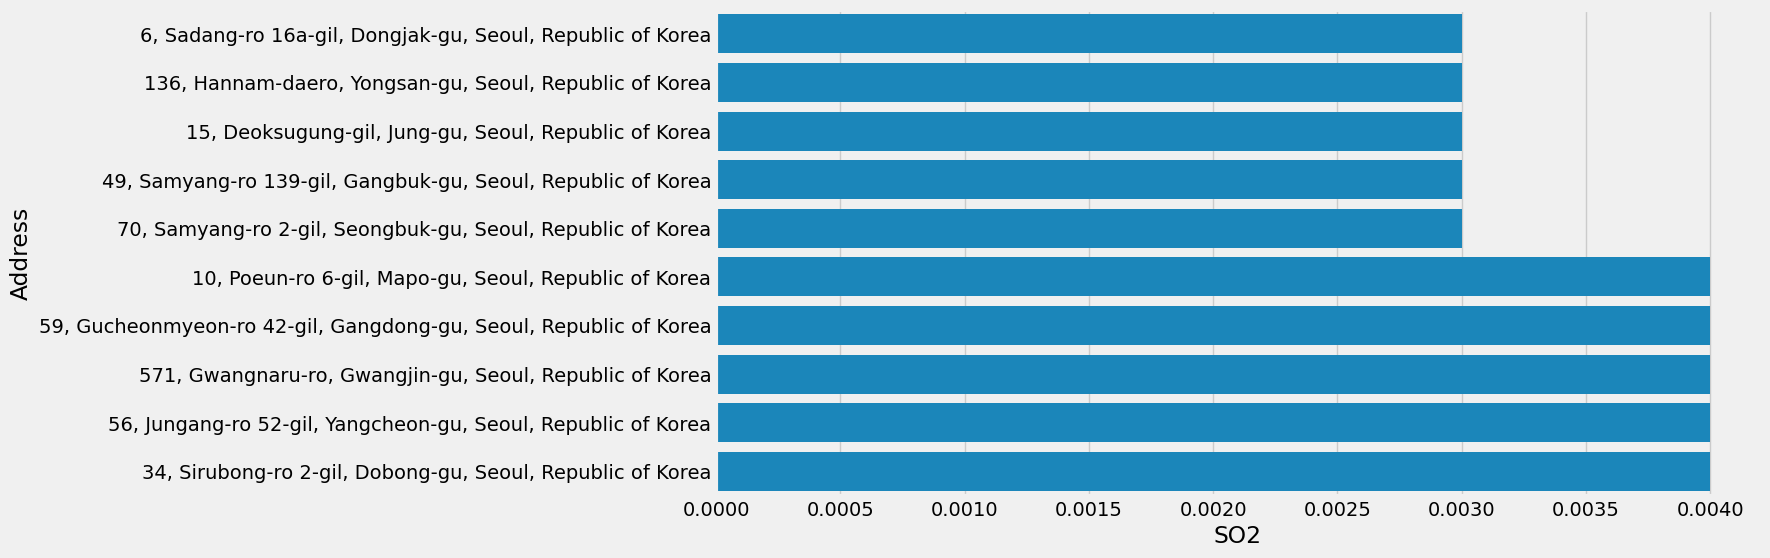

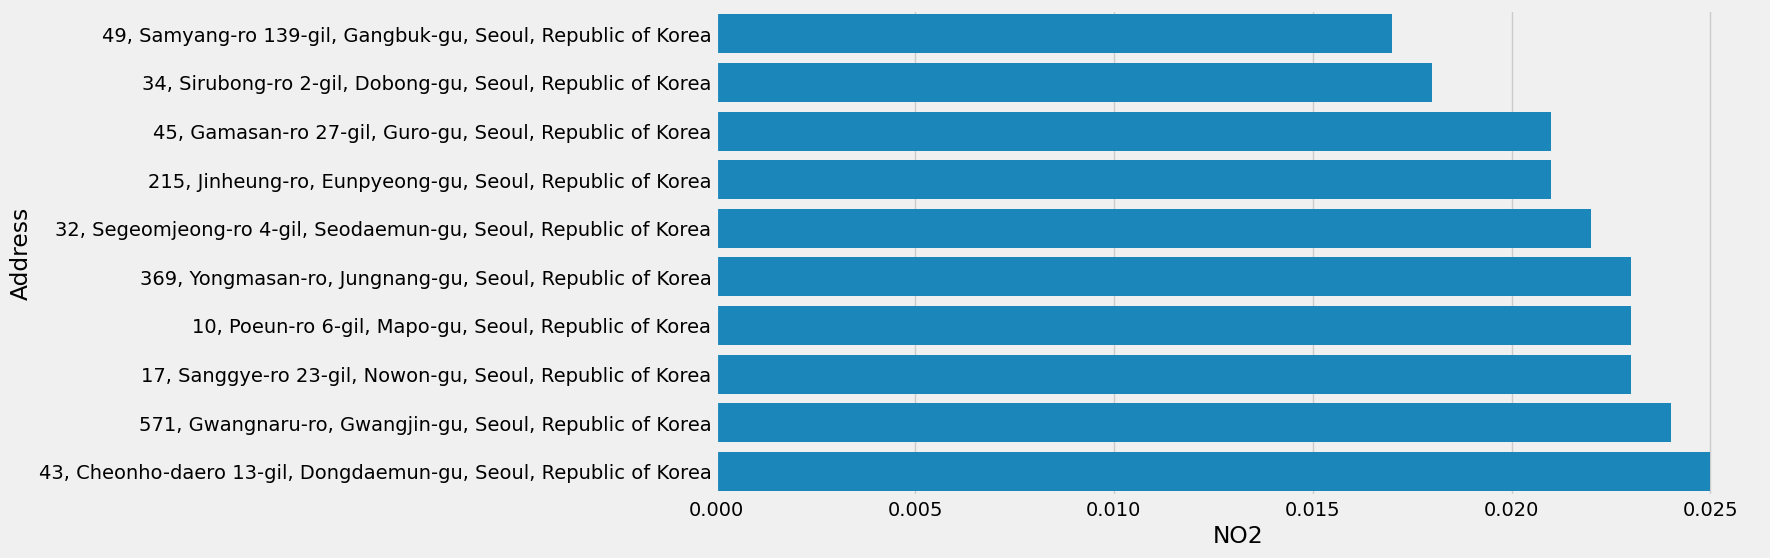

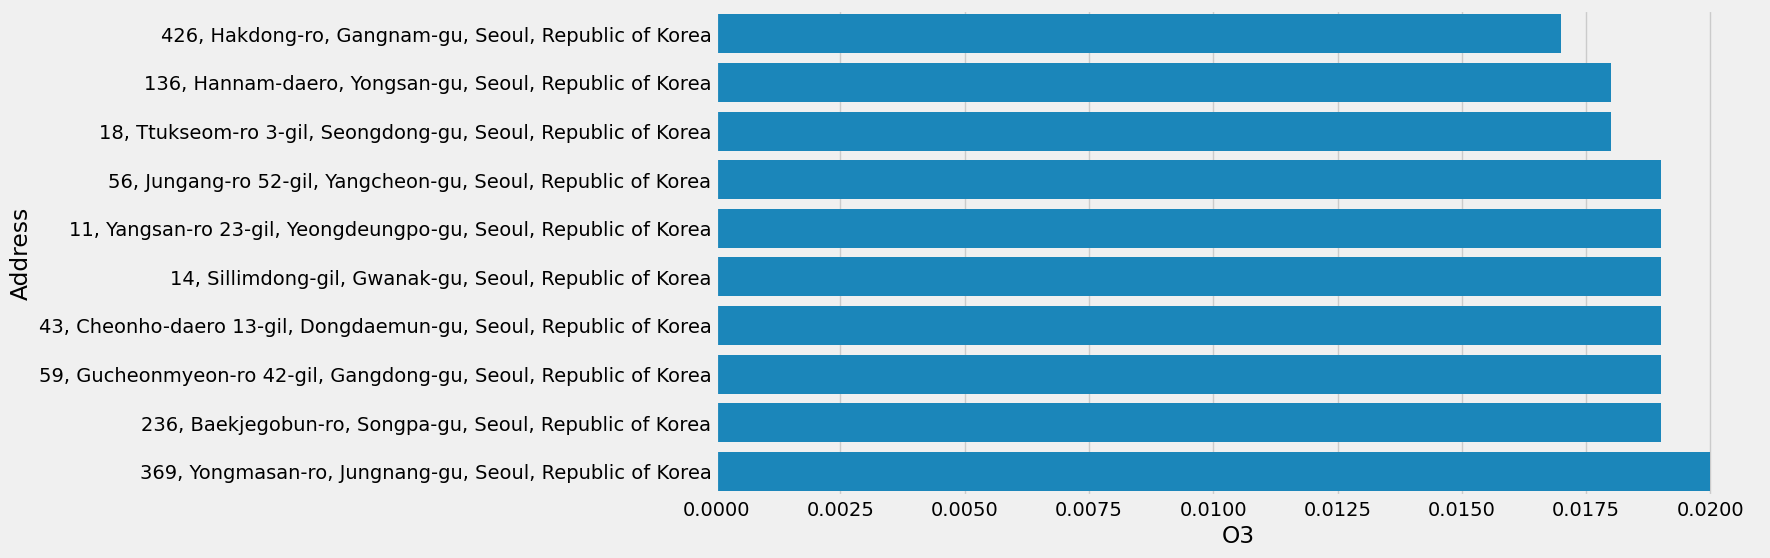

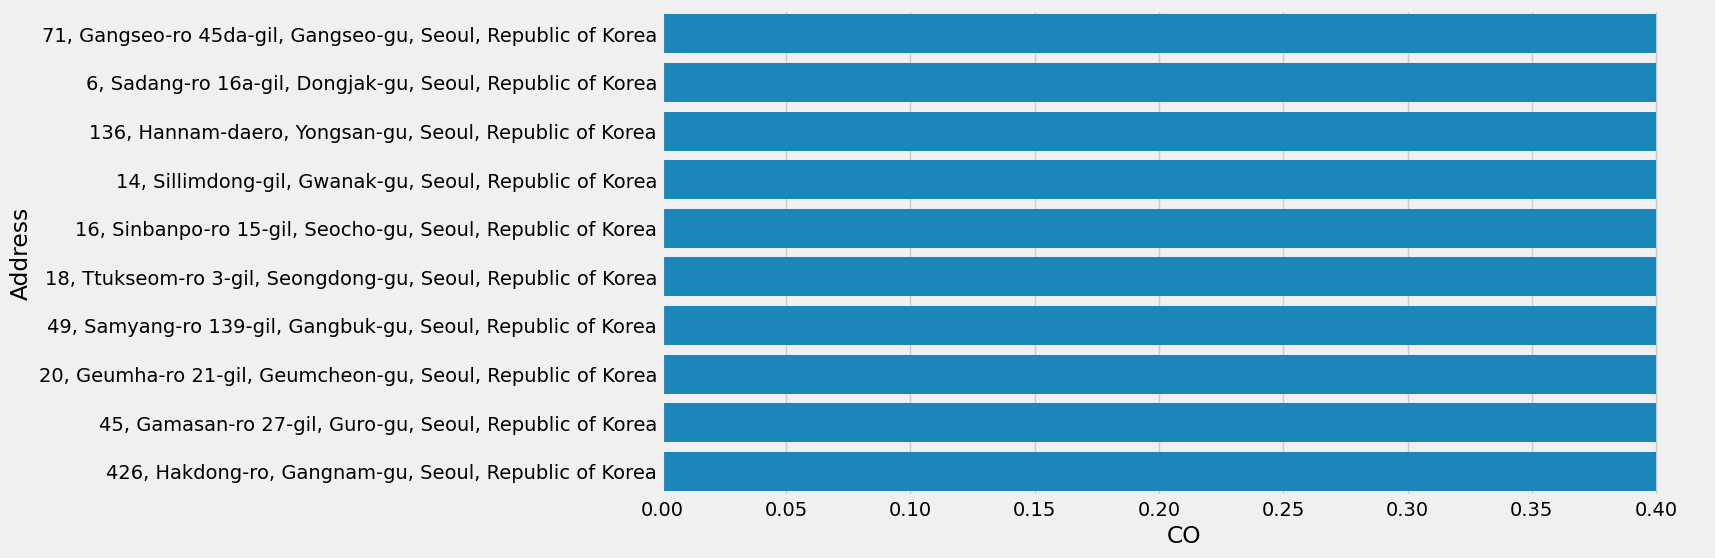

In [16]:
'''sorting top 10 address based on each pollutant'''

print ("Total Address: ", len(np.unique(data1.Address)))
PM10_Address = data1.groupby('Address').agg({'PM10': 'median'}).sort_values('PM10').reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y="Address", x="PM10", data=PM10_Address.head(10))
plt.ioff()
print(PM10_Address.sort_values('PM10').head(10))

PM10 = PM10_Address.sort_values('PM10').head(10)
print ("Total Address: ", len(np.unique(data1.Address)))
PM2_5_Address = data1.groupby('Address').agg({'PM2.5': 'median'}).sort_values('PM2.5').reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y="Address", x="PM2.5", data=PM2_5_Address.head(10))
plt.ioff()
print(PM2_5_Address.sort_values('PM2.5').head(10))

PM2_5 = PM2_5_Address.sort_values('PM2.5').head(10)
print ("Total Address: ", len(np.unique(data1.Address)))
SO2_Address = data1.groupby('Address').agg({'SO2': 'median'}).sort_values('SO2').reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y="Address", x="SO2", data=SO2_Address.head(10))
plt.ioff()
print(SO2_Address.sort_values('SO2').head(10))
SO2 = SO2_Address.sort_values('SO2').head(10)
print ("Total Address: ", len(np.unique(data1.Address)))

NO2_Address = data1.groupby('Address').agg({'NO2': 'median'}).sort_values('NO2').reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y="Address", x="NO2", data=NO2_Address.head(10))
plt.ioff()
print(NO2_Address.sort_values('NO2').head(10))
NO2 = NO2_Address.sort_values('NO2').head(10)

print ("Total Address: ", len(np.unique(data1.Address)))
O3_Address = data1.groupby('Address').agg({'O3': 'median'}).sort_values('O3').reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y="Address", x="O3", data=O3_Address.head(10))
plt.ioff()
print(O3_Address.sort_values('O3').head(10))
O3 = O3_Address.sort_values('O3').head(10)

print ("Total Address: ", len(np.unique(data1.Address)))
CO_Address = data1.groupby('Address').agg({'CO': 'median'}).sort_values('CO').reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y="Address", x="CO", data=CO_Address.head(10))
plt.ioff()
print(CO_Address.sort_values('CO').head(10))
CO = CO_Address.sort_values('CO').head(10)

    There so many address on this dataset, so i will pick 10 highest values address from each pollutants
    
    And then, i try to figure out from 10 sub district that we know before which sub district that often appear on that rank. I choose 5 top sub address that we want to analyze later.
    
    As you can see, to represent the pollutants values i prefer to choose median rather than mean, because the data have outlier (maximum values) that have great values which will effect the result when we use mean.

In [17]:
'''knowing cities most append on top 10'''

#menggabungkan data top 10 kota teracun
top_10 = pd.concat([PM10, PM2_5, SO2, NO2, O3, CO])

#set style
plt.style.use('fivethirtyeight')
#set size
fig,ax=plt.subplots(1,2,figsize=(15,8))
#set style
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
#set graph
top_10.Address.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
#set title
ax[0].set_title("Top 10 Cities",size=20)
#set lable
ax[0].set_xlabel('Count',size=18)

#set data
count=top_10['Address'].value_counts()
#
groups=list(top_10['Address'].value_counts().index)[:10]
#
counts=list(count[:10])
#
counts.append(count.agg(sum)-count[:10].agg('sum'))
#
groups.append('Other')
#set data
type_dict=pd.DataFrame({"group":groups,"counts":counts})
#set warna
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
#set graph
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
#set legend
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4))
#set size
plt.subplots_adjust(wspace =0.5, hspace =0)
#showing
plt.ioff()
#mengilangkan label y
plt.ylabel('')
#
pass
#membuat objek
top_10_cities = pd.DataFrame(top_10.Address.value_counts().sort_values(ascending=False)[:10])
#menampilkan data
print(top_10_cities)

                                                    count
Address                                                  
136, Hannam-daero, Yongsan-gu, Seoul, Republic ...      5
49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Repu...      5
369, Yongmasan-ro, Jungnang-gu, Seoul, Republic...      5
43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul,...      4
15, Deoksugung-gil, Jung-gu, Seoul, Republic of...      3
426, Hakdong-ro, Gangnam-gu, Seoul, Republic of...      3
34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Republ...      3
32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul, ...      3
16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repub...      3
14, Sillimdong-gil, Gwanak-gu, Seoul, Republic ...      3


<ipython-input-17-6096fea18d3f>:26: FutureWarning: The provided callable <built-in function sum> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  counts.append(count.agg(sum)-count[:10].agg('sum'))


    From this output i choose 5 sub-district that is:
    1. Hannam-daero
    2. Hakdong-ro
    3. Yongmasan-ro
    4. Samyang-ro
    5. Cheonho-daero
    
    These are the sub-district which most polluted based on our analyze. For further, we will analyze this sub-district

<ipython-input-18-d685fda9bb9f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[data1.Address=='136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea'].PM10,color='maroon',hist=False,label='Hannam-daero')
<ipython-input-18-d685fda9bb9f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

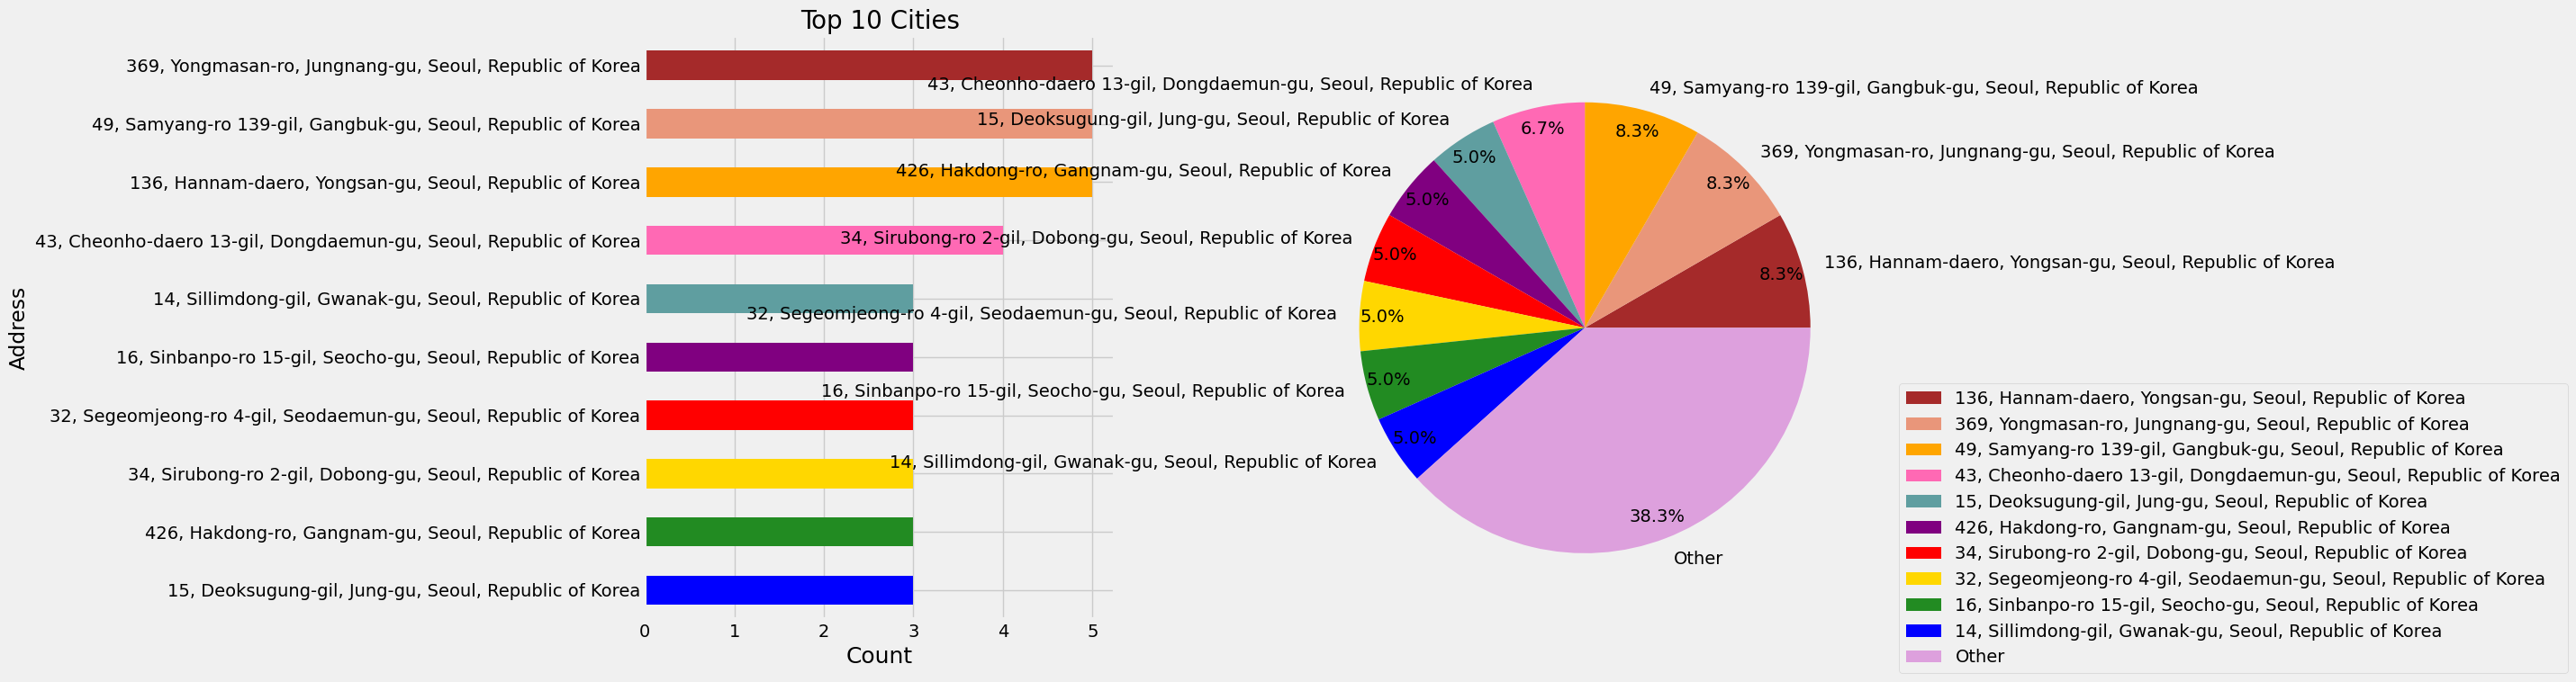

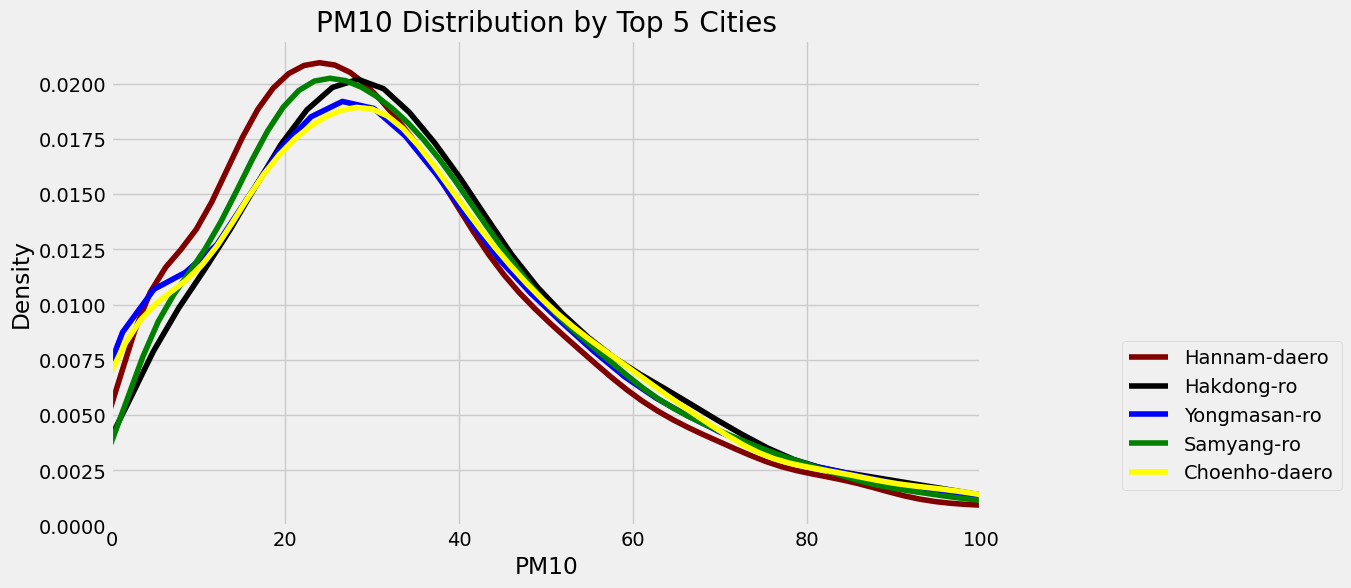

In [18]:
'''PM10 Distribution by Top 5 Cities'''

plt.figure(figsize=(10,6))
sns.distplot(data1[data1.Address=='136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea'].PM10,color='maroon',hist=False,label='Hannam-daero')
sns.distplot(data1[data1.Address=='426, Hakdong-ro, Gangnam-gu, Seoul, Republic of Korea'].PM10,color='black',hist=False,label='Hakdong-ro')
sns.distplot(data1[data1.Address=='369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea'].PM10,color='blue',hist=False,label='Yongmasan-ro')
sns.distplot(data1[data1.Address=='49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea'].PM10,color='green',hist=False,label='Samyang-ro')
sns.distplot(data1[data1.Address=='43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea'].PM10,color='yellow',hist=False,label='Choenho-daero')
plt.title('PM10 Distribution by Top 5 Cities')
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4))
plt.xlim(0,100)
plt.show()

<ipython-input-19-87ce813f5011>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[data1.Address=='136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea'].SO2,color='maroon',hist=False,label='Hannam-daero')
<ipython-input-19-87ce813f5011>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


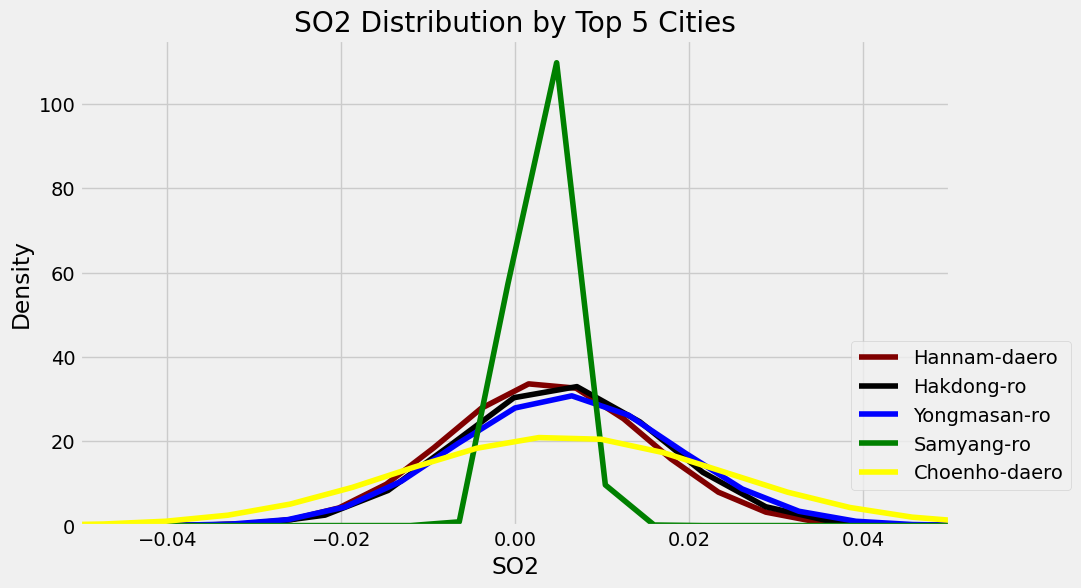

In [19]:
'''SO2 Distribution by Top 5 Cities'''
plt.figure(figsize=(10,6))
sns.distplot(data1[data1.Address=='136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea'].SO2,color='maroon',hist=False,label='Hannam-daero')
sns.distplot(data1[data1.Address=='426, Hakdong-ro, Gangnam-gu, Seoul, Republic of Korea'].SO2,color='black',hist=False,label='Hakdong-ro')
sns.distplot(data1[data1.Address=='369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea'].SO2,color='blue',hist=False,label='Yongmasan-ro')
sns.distplot(data1[data1.Address=='49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea'].SO2,color='green',hist=False,label='Samyang-ro')
sns.distplot(data1[data1.Address=='43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea'].SO2,color='yellow',hist=False,label='Choenho-daero')
plt.title('SO2 Distribution by Top 5 Cities')
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4))
plt.xlim(0,0,1)
plt.show()

<ipython-input-20-d7830b368084>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[data1.Address=='136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea'].NO2,color='maroon',hist=False,label='Hannam-daero')
<ipython-input-20-d7830b368084>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


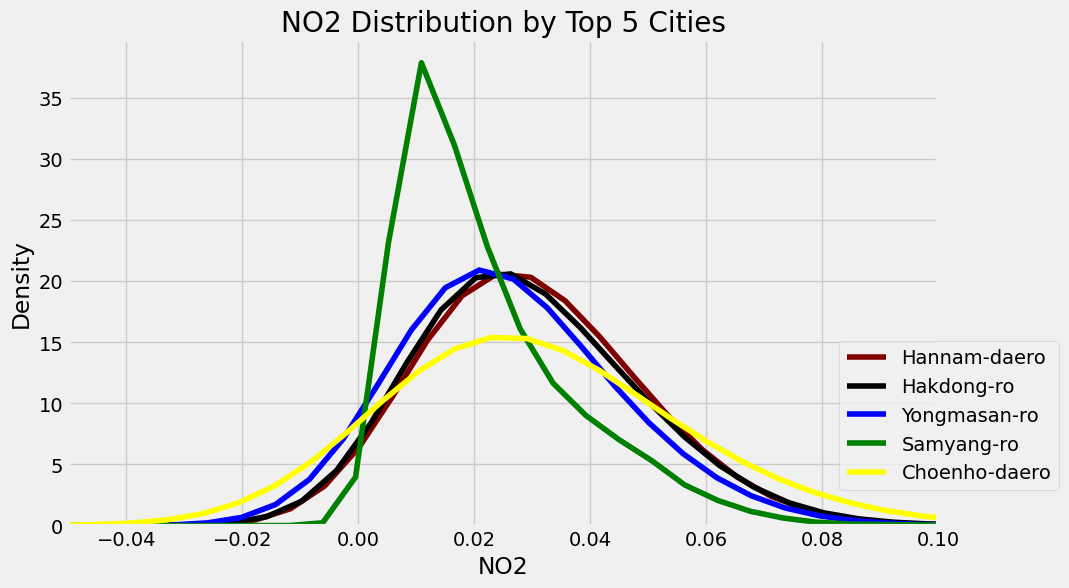

In [20]:
'''NO2 Distribution by Top 5 Cities'''
plt.figure(figsize=(10,6))
sns.distplot(data1[data1.Address=='136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea'].NO2,color='maroon',hist=False,label='Hannam-daero')
sns.distplot(data1[data1.Address=='426, Hakdong-ro, Gangnam-gu, Seoul, Republic of Korea'].NO2,color='black',hist=False,label='Hakdong-ro')
sns.distplot(data1[data1.Address=='369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea'].NO2,color='blue',hist=False,label='Yongmasan-ro')
sns.distplot(data1[data1.Address=='49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea'].NO2,color='green',hist=False,label='Samyang-ro')
sns.distplot(data1[data1.Address=='43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea'].NO2,color='yellow',hist=False,label='Choenho-daero')
plt.title('NO2 Distribution by Top 5 Cities')
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4))
plt.xlim(-0.05,0.1)
plt.show()

<ipython-input-21-5f5b167b36c8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[data1.Address=='136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea'].O3,color='maroon',hist=False,label='Hannam-daero')
<ipython-input-21-5f5b167b36c8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



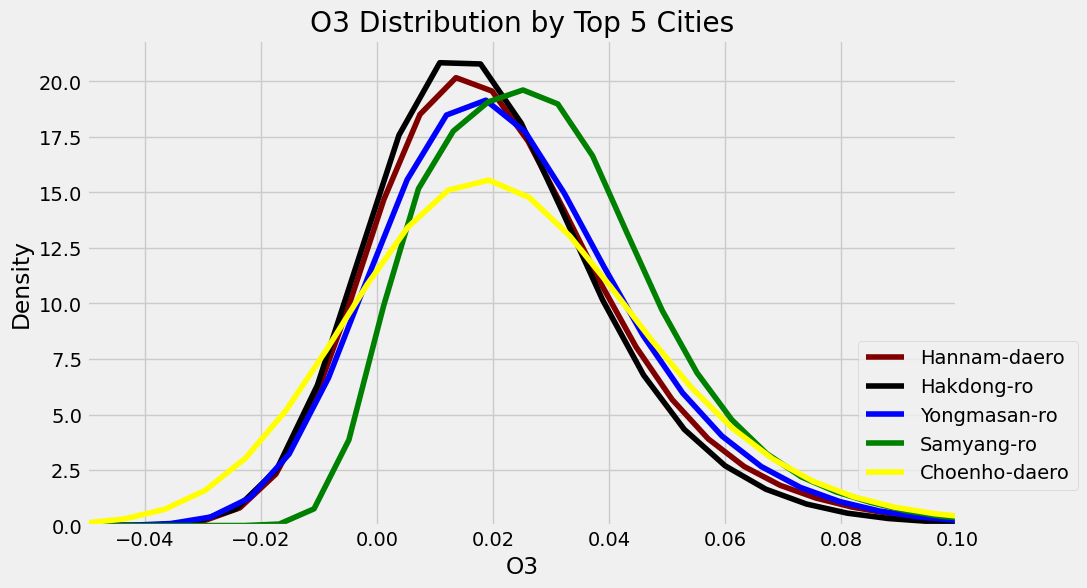

In [21]:
'''O3 Distribution by Top 5 Cities'''
plt.figure(figsize=(10,6))
sns.distplot(data1[data1.Address=='136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea'].O3,color='maroon',hist=False,label='Hannam-daero')
sns.distplot(data1[data1.Address=='426, Hakdong-ro, Gangnam-gu, Seoul, Republic of Korea'].O3,color='black',hist=False,label='Hakdong-ro')
sns.distplot(data1[data1.Address=='369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea'].O3,color='blue',hist=False,label='Yongmasan-ro')
sns.distplot(data1[data1.Address=='49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea'].O3,color='green',hist=False,label='Samyang-ro')
sns.distplot(data1[data1.Address=='43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea'].O3,color='yellow',hist=False,label='Choenho-daero')
plt.title('O3 Distribution by Top 5 Cities')
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4))
plt.xlim(-0.05,0.1)
plt.show()

<ipython-input-22-a4adbb4b7db1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[data1.Address=='136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea'].CO,color='maroon',hist=False,label='Hannam-daero')
<ipython-input-22-a4adbb4b7db1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



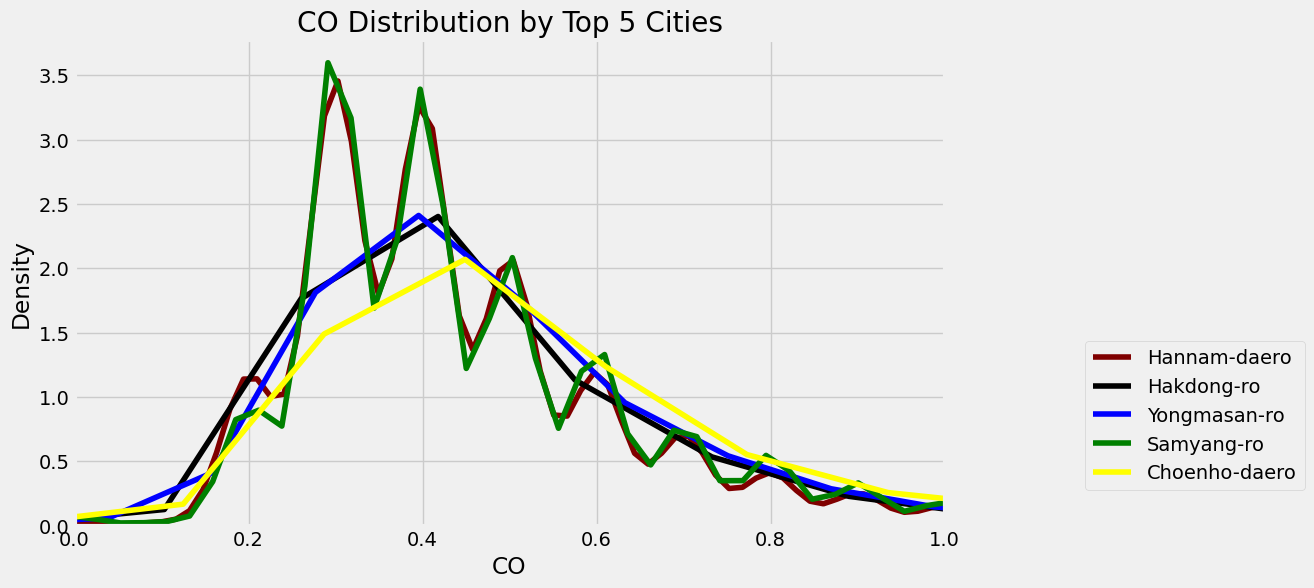

In [22]:
'''CO Distribution by Top 5 Cities'''
plt.figure(figsize=(10,6))
sns.distplot(data1[data1.Address=='136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea'].CO,color='maroon',hist=False,label='Hannam-daero')
sns.distplot(data1[data1.Address=='426, Hakdong-ro, Gangnam-gu, Seoul, Republic of Korea'].CO,color='black',hist=False,label='Hakdong-ro')
sns.distplot(data1[data1.Address=='369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea'].CO,color='blue',hist=False,label='Yongmasan-ro')
sns.distplot(data1[data1.Address=='49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea'].CO,color='green',hist=False,label='Samyang-ro')
sns.distplot(data1[data1.Address=='43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea'].CO,color='yellow',hist=False,label='Choenho-daero')
plt.title('CO Distribution by Top 5 Cities')
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4))
plt.xlim(0,1)
plt.show()

    This is the summarize of the distribution graph form each pollutant by top 5 area:
    1. PM10: 20 - 35
    2. SO2: 0.00 - 0.01. There is such an anomaly on Samyang-ro area, which have high density value on 0.01 SO2. We dont know yet why it happened, do you have any idea? Please let me know on the comment column.
    3. O3: 0.00 - 0.02
    4. CO: for Hakdong-ro, Yongmasan-ro, Choenho-daero have CO values 0.4. But in other area, we can see that there is up and down value which we dont know why, maybe the wildfire happen in 2017-2019 in South Korea? Idk.

In [23]:
'''box plot'''

#slicing interested columns
data2 = data1[(data1["Address"] == '136, Hannam-aero, Yongsan-gu, Seoul, Republic of Korea') | (data1["Address"] == '426, Hakdong-ro, Gangnam-gu, Seoul, Republic of Korea') | (data1["Address"] == '369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea') | (data1["Address"] == '49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea') | (data1["Address"] == '43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea')]

plt.figure(figsize=(5,5))
ax = sns.boxplot(data=data2, x='Station code',y='PM10',palette='plasma')
ax.set(ylim=(-10, 100))

plt.figure(figsize=(5,5))
ax = sns.boxplot(data=data2, x='Station code',y='PM2.5',palette='plasma')
ax.set(ylim=(-10, 100))

plt.figure(figsize=(5,5))
ax = sns.boxplot(data=data2, x='Station code',y='SO2',palette='plasma')
ax.set(ylim=(0, 0.03))

plt.figure(figsize=(5,5))
ax = sns.boxplot(data=data2, x='Station code',y='NO2',palette='plasma')
ax.set(ylim=(0, 0.05))

plt.figure(figsize=(5,5))
ax = sns.boxplot(data=data2, x='Station code',y='CO',palette='plasma')
ax.set(ylim=(0.2, 0.8))

plt.figure(figsize=(5,5))
ax = sns.boxplot(data=data2, x='Station code',y='O3',palette='plasma')
ax.set(ylim=(0, 0.05))

<ipython-input-23-815a177eaf1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data2, x='Station code',y='PM10',palette='plasma')
<ipython-input-23-815a177eaf1d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data2, x='Station code',y='PM2.5',palette='plasma')
<ipython-input-23-815a177eaf1d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data2, x='Station code',y='SO2',palette='plasma')
<ipython-input-23-815a177eaf1d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

[(0.0, 0.05)]

    This is additional data to support our analyze before. From this output we can see min, max, and mean of the pollutant from each area.

In [25]:
'''showing heat map'''
# Convert 'Measurement date' column to datetime objects
data1['Measurement date'] = pd.to_datetime(data1['Measurement date'])

# Extract numerical features for correlation calculation
numerical_data = data1.select_dtypes(include=['number'])

# Calculate and display the correlation matrix
numerical_data.corr().style.background_gradient(cmap='coolwarm')

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
Station code,1.000000,-0.489776,0.047065,0.027527,0.021526,0.018991,-0.034751,0.030143,0.017422
Latitude,-0.489776,1.000000,0.307581,-0.006797,-0.020962,0.000373,0.056444,-0.021874,-0.023076
Longitude,0.047065,0.307581,1.000000,0.015209,0.008582,0.007398,0.035379,-0.022757,-0.018933
SO2,0.027527,-0.006797,0.015209,1.000000,0.712422,0.805551,0.304923,0.048573,0.047531
NO2,0.021526,-0.020962,0.008582,0.712422,1.000000,0.785805,0.245746,0.055532,0.057844
O3,0.018991,0.000373,0.007398,0.805551,0.785805,1.000000,0.188998,0.038602,0.033868
CO,-0.034751,0.056444,0.035379,0.304923,0.245746,0.188998,1.000000,0.151166,0.182867
PM10,0.030143,-0.021874,-0.022757,0.048573,0.055532,0.038602,0.151166,1.000000,0.228984
PM2.5,0.017422,-0.023076,-0.018933,0.047531,0.057844,0.033868,0.182867,0.228984,1.000000


    These output say that O3 have strong correlation with SO2.

    That's all my analysis, maybe in the future we will continue with modeling using linear regression or other modeling methods. Grazie Mille!